In [2]:
!pip install pyproj

In [3]:
import sys
sys.path.insert(0,'/content/drive/Othercomputers/My Laptop/github-repositories/wavenet-trajectory/')  #Root folder
sys.path.insert(0,'/content/drive/Othercomputers/My Laptop/github-repositories/wavenet-trajectory/utils') # Libraries folder

from utils import map_vis_without_lanelet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import math
from numpy.random import default_rng
import time

from sklearn import preprocessing

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import shapely

In [4]:
# Converts a polygon in lat,long to a polygon in x,y coords
def latlon2xy_polygon(P):

    points = []

    P_x = shapely.get_coordinates(P)[:,0]
    P_y = shapely.get_coordinates(P)[:,1]

    for x,y in zip(P_x,P_y):
        points.append(projector.latlon2xy(x, y))

    return  Polygon(np.array(points))

In [5]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import shapely
from shapely import MultiPoint

import geopandas as gpd
from shapely.geometry import Polygon


CENTER = Polygon([
(0.0091415,0.008972),
(0.0091498,0.0093028),
(0.009005,0.0093289),
(0.0089777,0.0089797)
])

# Create a projector object to use the lat,lon to x,y method
projector = map_vis_without_lanelet.LL2XYProjector(0.0,0.0)

# Convert all polygons to x,y polygons
polygon = latlon2xy_polygon(CENTER)



xmin,ymin,xmax,ymax =  polygon.bounds

width = 5
height = 5

#polygon = shape(geojson['features'][i]['geometry'])
#polygon = CENTER
resolution = 5
lonmin, latmin, lonmax, latmax = polygon.bounds

# construct rectangle of points

x, y = np.round(np.meshgrid(np.arange(lonmin, lonmax, resolution), np.arange(latmin, latmax, resolution)),4)
points = MultiPoint(list(zip(x.flatten(),y.flatten())))

# get grid dimensions
m = np.transpose(y)[0].shape[0]
n = x[0].shape[0]


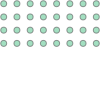

In [6]:
points

In [7]:
print(m,n)

4 8


In [8]:
x[0]

array([ 999.7384, 1004.7384, 1009.7384, 1014.7384, 1019.7384, 1024.7384,
       1029.7384, 1034.7384])

In [9]:
np.transpose(y)[0]

array([ 993.6684,  998.6684, 1003.6684, 1008.6684])

In [16]:
def get_index(longitudes,latitudes):

    # create grid
    grid = np.zeros((m+1,n+1), dtype=int)
    #print(grid.shape)

    # Get index for a list of points (coordinates)
    xindex = np.digitize(longitudes, x[0])
    yindex = np.digitize(latitudes,np.transpose(y)[0])

    #print(xindex,yindex)
    # fill the grid

    for (col, row) in zip(xindex, yindex):
        grid[row,col] = 1

    # Remove borders of the grid, remove outside elements
    grid = grid[1:-1, 1:-1]
    return grid
#999.7384, 1004.7384, 1009.7384, 1014.7384, 1019.7384, 1024.7384,
  #     1029.7384, 1034.7384]

In [12]:
get_index([998,1000,1005,1010,1015],[992,994,999,1004,1009])

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]))

In [11]:
get_index([998,1000,1005,1010,1015],[992,994,999,1004,1009])

[0 1 2 3 4] [0 1 2 3 4]


array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]])

In [17]:
# Read train dataset
df = pd.read_csv("/content/drive/Othercomputers/My Laptop/github-repositories/wavenet-trajectory/data/DR_USA_Intersection_MA/_train.csv", sep=',')

df = df.head(700)

groups = df.groupby(['frame_ix'])



for name, group in groups:
   # print(len(group.x.values),len(group.y.values))
    #print(group)
    g = get_index(group.x.values,group.y.values)
    print(g)

#g = get_index()



#df = grid_labelization()

#df.to_csv('/content/drive/Othercomputers/My Laptop/github-repositories/wavenet-trajectory/data/DR_USA_Intersection_MA/_train_grid.csv',  index = False)

[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1]]
[[0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1]]
[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]
[[0 0 0 0 0 

<ipython-input-17-b0fac01ab2d3>:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


In [ ]:
g = df.groupby(['case_id', 'frame_id'])

In [ ]:
for name, group in g:

    grid = get_index(group.x,group.y)

    # asignar un indice unico para todas estas rows del grupo
    # crear un diccionario que tenga como llave el indice unico y como valor la
    # matriz de estados

#    print(name)
#    print(group)
#    print("\n")
     print(group.x.shape)

(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(9,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(5,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


KeyboardInterrupt: ignored

In [ ]:
def get_section_label(x,y):

    start_point = Point(x, y)

    entrance = 'U'

    if A.contains(start_point):
        entrance = 'A'
    if B.contains(start_point):
        entrance = 'B'
    if C.contains(start_point):
        entrance = 'C'
    if D.contains(start_point):
        entrance = 'D'
    if E.contains(start_point):
        entrance = 'E'
    if F.contains(start_point):
        entrance = 'F'
    if G.contains(start_point):
        entrance = 'G'
    if H.contains(start_point):
        entrance = 'H'
    if I.contains(start_point):
        entrance = 'I'
    if I.contains(start_point):
        entrance = 'Z'

    return entrance


In [ ]:
dataset['section'] = dataset.apply(lambda row : get_section_label(row['x'], row['y']), axis = 1)

In [ ]:
a = dataset.loc[dataset['section'] == 'U']

In [ ]:
a.shape

(26961, 13)

In [ ]:
a.head(10)

,case_id,track_id,frame_id,timestamp_ms,agent_type,x,y,vx,vy,psi_rad,length,width,section
1105,3.0,1,18,1800,pedestrian/bicycle,1003.870,989.406,-4.412,-1.508,NaN,NaN,NaN,U
1120,3.0,1,19,1900,pedestrian/bicycle,1003.434,989.252,-4.298,-1.568,NaN,NaN,NaN,U
1135,3.0,1,20,2000,pedestrian/bicycle,1003.012,989.094,-4.141,-1.602,NaN,NaN,NaN,U
1150,3.0,1,21,2100,pedestrian/bicycle,1002.608,988.933,-3.946,-1.609,NaN,NaN,NaN,U
1165,3.0,1,22,2200,pedestrian/bicycle,1002.224,988.773,-3.727,-1.591,NaN,NaN,NaN,U
1180,3.0,1,23,2300,pedestrian/bicycle,1001.862,988.616,-3.506,-1.550,NaN,NaN,NaN,U
1195,3.0,1,24,2400,pedestrian/bicycle,1001.522,988.464,-3.310,-1.498,NaN,NaN,NaN,U
1210,3.0,1,25,2500,pedestrian/bicycle,1001.198,988.316,-3.164,-1.453,NaN,NaN,NaN,U
1225,3.0,1,26,2600,pedestrian/bicycle,1000.886,988.173,-3.084,-1.425,NaN,NaN,NaN,U
1240,3.0,1,27,2700,pedestrian/bicycle,1000.578,988.030,-3.061,-1.417,NaN,NaN,NaN,U


In [ ]:
group_id = dataset.groupby(["case_id","object_id","section"]).count()

In [ ]:
group_id = dataset.groupby(["object_id"])

for object_id,car in group_id:

    start_point = Point(car.x.iloc[0], car.y.iloc[0])
    end_point = Point(car.x.iloc[-1], car.y.iloc[-1])

    entrance = 'I'  # 'Z'
    exit = 'I'      # 'Z'

    if A.contains(start_point):
        entrance = 'A'
    if B.contains(start_point):
        entrance = 'B'
    if C.contains(start_point):
        entrance = 'C'
    if D.contains(start_point):
        entrance = 'D'
    if E.contains(start_point):
        entrance = 'E'
    if F.contains(start_point):
        entrance = 'F'
    if G.contains(start_point):
        entrance = 'G'
    if H.contains(start_point):
        entrance = 'H'
    if I.contains(start_point):
        entrance = 'I'


    if A.contains(end_point):
        exit = 'A'
    if B.contains(end_point):
        exit = 'B'
    if C.contains(end_point):
        exit = 'C'
    if D.contains(end_point):
        exit = 'D'
    if E.contains(end_point):
        exit = 'E'
    if F.contains(end_point):
        exit = 'F'
    if G.contains(end_point):
        exit = 'G'
    if H.contains(end_point):
        exit = 'H'
    if I.contains(end_point):
       exit = 'I'

 #   if entrance == 'Z':
 #       print(object_id)
 #       print(start_point)

 #   if exit == 'Z':
 #      print(object_id)
 #      print(end_point)

    dataset.loc[dataset['object_id'] == object_id, 'entrance'] = entrance
    dataset.loc[dataset['object_id'] == object_id, 'exit'] = exit

In [ ]:
# Convert to manueuvers

dataset.loc[dataset['entrance'] == dataset['exit'], 'maneuver'] = 'straight'

dataset.loc[(dataset['entrance'] == 'B') & (dataset['exit'] == 'C'), 'maneuver'] = 'right'
dataset.loc[(dataset['entrance'] == 'D') & (dataset['exit'] == 'E'), 'maneuver'] = 'right'
dataset.loc[(dataset['entrance'] == 'F') & (dataset['exit'] == 'G'), 'maneuver'] = 'right'
dataset.loc[(dataset['entrance'] == 'H') & (dataset['exit'] == 'A'), 'maneuver'] = 'right'

dataset.loc[(dataset['entrance'] == 'B') & (dataset['exit'] == 'E'), 'maneuver'] = 'straight'
dataset.loc[(dataset['entrance'] == 'D') & (dataset['exit'] == 'G'), 'maneuver'] = 'straight'
dataset.loc[(dataset['entrance'] == 'F') & (dataset['exit'] == 'A'), 'maneuver'] = 'straight'
dataset.loc[(dataset['entrance'] == 'H') & (dataset['exit'] == 'C'), 'maneuver'] = 'straight'

dataset.loc[(dataset['entrance'] == 'B') & (dataset['exit'] == 'G'), 'maneuver'] = 'left'
dataset.loc[(dataset['entrance'] == 'D') & (dataset['exit'] == 'A'), 'maneuver'] = 'left'
dataset.loc[(dataset['entrance'] == 'F') & (dataset['exit'] == 'C'), 'maneuver'] = 'left'
dataset.loc[(dataset['entrance'] == 'H') & (dataset['exit'] == 'E'), 'maneuver'] = 'left'


dataset.loc[(dataset['entrance'] == 'I') & (dataset['exit'] == 'A'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'I') & (dataset['exit'] == 'B'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'I') & (dataset['exit'] == 'C'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'I') & (dataset['exit'] == 'D'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'I') & (dataset['exit'] == 'E'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'I') & (dataset['exit'] == 'F'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'I') & (dataset['exit'] == 'G'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'I') & (dataset['exit'] == 'H'), 'maneuver'] = 'undefined'

dataset.loc[(dataset['entrance'] == 'A') & (dataset['exit'] == 'I'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'B') & (dataset['exit'] == 'I'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'C') & (dataset['exit'] == 'I'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'D') & (dataset['exit'] == 'I'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'E') & (dataset['exit'] == 'I'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'F') & (dataset['exit'] == 'I'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'G') & (dataset['exit'] == 'I'), 'maneuver'] = 'undefined'
dataset.loc[(dataset['entrance'] == 'H') & (dataset['exit'] == 'I'), 'maneuver'] = 'undefined'

dataset['maneuver'] = dataset['maneuver'].fillna('undefinded')

In [ ]:
df = dataset.loc[(dataset['entrance']=='I') | (dataset['exit']=='I')]

In [ ]:
df = df.drop(columns=["entrance","exit"])

In [ ]:
def create_filtered_dataset(df, max_cars, max_radius,split):

    column_names = list(df.columns)

    filtered = []

    case_id = df.groupby(["cluster_id"])


    for ix,element in case_id:
        l = element.groupby(["object_id"])
        if(len(l)==max_cars): # number of interacting vehicles
            for iy,e in l:
                filtered.append(e.values.tolist())

    # Convert list results to array
    filtered_array = np.array(filtered)

    filtered_array = filtered_array.reshape(-1,filtered_array.shape[2]) # Remove the dimension added by grouping by case. 15 is the number of features

    filtered_df = pd.DataFrame(filtered_array,columns= column_names)

    # Types of columns
    filtered_df.object_id = filtered_df.object_id.astype('int64')
    filtered_df.cluster_id = filtered_df.cluster_id.astype('int64')
    filtered_df.case_id = filtered_df.case_id.astype('int64')

#    filtered_df.drop(columns=['frame_id'],inplace=True)

    # Save filtered dataset to file
    filtered_df.to_csv('/content/drive/Othercomputers/My Laptop/github-repositories/GNN-trajectory-prediction-2023/data/DR_USA_Intersection_MA/'+str(max_radius)+"m/center-"+str(max_radius)+'m-'+str(max_cars)+'c-'+split+'.csv',  index = False)




In [ ]:
create_filtered_dataset(df, max_cars = 3, max_radius=20, split="test")